In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


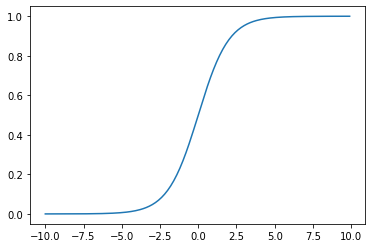

In [3]:
x = np.arange(-10,10,0.1)
sigmoid = 1/(1+np.power(np.e,-x))
plt.plot(x,sigmoid)
plt.show()

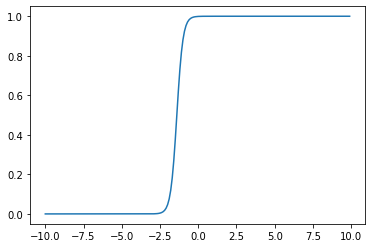

In [5]:
y = 5*x + 7
sigmoid = 1/(1+np.power(np.e,-y)) #Converting the linear regression line to a sigmoid function to remove errors so called logistic regression
plt.plot(x,sigmoid)
plt.show()

In [6]:
titanic = pd.DataFrame(pd.read_csv("/home/shivasai7392/Desktop/DS/titanic_train.csv"))

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.shape

(891, 12)

In [9]:
titanic.drop(["Name","Ticket","Fare","Embarked","Cabin","Parch","PassengerId"],axis = 1,inplace=True)

In [10]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [11]:
titanic.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
dtype: int64

In [12]:
gender = pd.get_dummies(titanic["Sex"],drop_first=True)

In [13]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [14]:
titanic.drop("Sex",axis =1,inplace=True)

In [15]:
titanic

,Survived,Pclass,Age,SibSp
0,0,3,22.0,1
1,1,1,38.0,1
2,1,3,26.0,0
3,1,1,35.0,1
4,0,3,35.0,0
...,...,...,...,...
886,0,2,27.0,0
887,1,1,19.0,0
888,0,3,NaN,1
889,1,1,26.0,0


In [16]:
pd.concat([titanic,gender],axis = 1)

,Survived,Pclass,Age,SibSp,male
0,0,3,22.0,1,1
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1
...,...,...,...,...,...
886,0,2,27.0,0,1
887,1,1,19.0,0,0
888,0,3,NaN,1,0
889,1,1,26.0,0,1


In [17]:
titanic = pd.concat([titanic,gender],axis = 1)

In [19]:
titanic.head()

,Survived,Pclass,Age,SibSp,male
0,0,3,22.0,1,1
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1


In [18]:
X = titanic.iloc[:,1:]

In [19]:
X

,Pclass,Age,SibSp,male
0,3,22.0,1,1
1,1,38.0,1,0
2,3,26.0,0,0
3,1,35.0,1,0
4,3,35.0,0,1
...,...,...,...,...
886,2,27.0,0,1
887,1,19.0,0,0
888,3,NaN,1,0
889,1,26.0,0,1


In [20]:
y = titanic.iloc[:,0:1]

In [21]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [22]:
from sklearn.model_selection import train_test_split

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [24]:
X_train.shape

(668, 4)

In [25]:
y_train.shape

(668, 1)

In [26]:
X_test.shape

(223, 4)

In [27]:
y_test.shape

(223, 1)

In [28]:
X.shape

(891, 4)

In [29]:
223 * 100/891    # we have taken 25 % to test by default

25.028058361391693

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [41]:
lr.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [32]:
titanic.head()

,Survived,Pclass,Age,SibSp,male
0,0,3,22.0,1,1
1,1,1,38.0,1,0
2,1,3,26.0,0,0
3,1,1,35.0,1,0
4,0,3,35.0,0,1


In [33]:
titanic.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
male          0
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

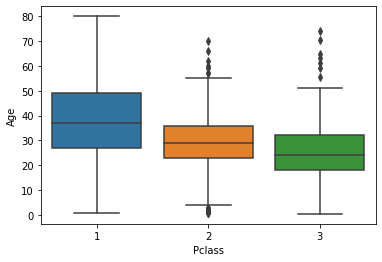

In [34]:
sns.boxplot("Pclass","Age",data = titanic)

In [40]:
for i in titanic.index:
    age = titanic["Age"][i]
    pclass = titanic["Pclass"][i]
    if (pd.isnull(age)):
        if(pclass == 1):
            titanic["Age"][i] = 38
        elif(pclass == 2):
            titanic["Age"][i] = 29
        else:
            titanic["Age"][i] = 25
    

/home/shivasai7392/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/shivasai7392/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/shivasai7392/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   male      891 non-null    uint8  
dtypes: float64(1), int64(3), uint8(1)
memory usage: 28.8 KB


In [42]:
titanic.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
male        0
dtype: int64

In [43]:
X = titanic.iloc[:,1:]

In [44]:
y = titanic.iloc[:,0:1]

In [45]:
X.head()

,Pclass,Age,SibSp,male
0,3,22.0,1,1
1,1,38.0,1,0
2,3,26.0,0,0
3,1,35.0,1,0
4,3,35.0,0,1


In [46]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [48]:
lr = LogisticRegression()

In [49]:
lr.fit(X_train,y_train)

/home/shivasai7392/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [50]:
lr.score(X_test,y_test)

0.7982062780269058

In [51]:
y_predicted = lr.predict(X_test)

In [52]:
y_predicted.shape

(223,)

In [53]:
y_test.shape

(223, 1)

In [54]:
y_test = y_test["Survived"]

In [55]:
y_test.shape

(223,)

In [56]:
np.mean(y_test == y_predicted)

0.7982062780269058

In [57]:
from sklearn.metrics import classification_report

In [58]:
result = classification_report(y_test,y_predicted)

In [59]:
print(result)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       139
           1       0.75      0.70      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223

